## **Import e Arquivo**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency

In [12]:
# Carregar a planilha (substitua o caminho do arquivo pelo caminho correto no seu sistema)
df_alunos = pd.read_csv('/home/wermelingerv/Documentos/GitHub/SoulCode/Bootcamp - ANALISE DE DADOS/Exercicio Estatística/MOCK_ALUNO.csv')

## 1. Amostragem Aleatória Simples
Desafio: Crie um DataFrame com 1000 registros de alunos, incluindo colunas para
**ID**, **Idade** e **Nota**. 

Realize uma amostragem aleatória simples de 100 alunos e
analise a média e a mediana das notas da amostra.
- Objetivo: Praticar a amostragem e entender as medidas de tendência central.

In [2]:
# Exibir as primeiras linhas para verificar o conteúdo
print(df_alunos.head())

   ID  Idade  Nota             Nome
0  79     30   5.6   Gustavo Nieass
1  43     19   0.6  Tammie Sutherns
2  35     20   4.1    Jordon Ruston
3  32     27   9.8      Benny Regan
4   6     22   5.1    Palmer Guerra


In [3]:
# Definindo o tamanho da amostra
amostra = 100

# Realizando a amostragem aleatória simples
amostra_df = df_alunos.sample(n=amostra, random_state=42)
display(amostra_df)

# Analisando a média e a mediana das notas
media_nota = amostra_df['Nota'].mean()
mediana_nota = amostra_df['Nota'].median()

# Exibindo os resultados
print("Média das Notas da Amostra:", media_nota)
print("Mediana das Notas da Amostra:", mediana_nota)


,ID,Idade,Nota,Nome
521,68,19,5.5,Ario Hambling
737,11,23,0.6,Dorry Pauncefoot
740,52,28,7.9,Seline Stive
660,82,23,7.4,Floyd Ledram
411,94,30,8.8,Danielle Henstone
...,...,...,...,...
436,95,30,3.9,Deerdre Gartan
764,27,22,6.3,Gorden Riddock
88,84,18,7.6,Myrilla Cutchey
63,27,23,9.2,Del Camel


Média das Notas da Amostra: 5.221
Mediana das Notas da Amostra: 5.55


## 2. Boxplot e Identificação de Outliers
Desafio: Use o DataFrame criado no desafio anterior e adicione uma coluna **Nota** com notas variando de 0 a 100. Plote um boxplot para as notas e identifique os outliers.
- Objetivo: Visualizar a distribuição das notas e entender o conceito de outliers.

   ID  Idade  Nota             Nome      Nota1
0  79     30   5.6   Gustavo Nieass  37.454012
1  43     19   0.6  Tammie Sutherns  95.071431
2  35     20   4.1    Jordon Ruston  73.199394
3  32     27   9.8      Benny Regan  59.865848
4   6     22   5.1    Palmer Guerra  15.601864


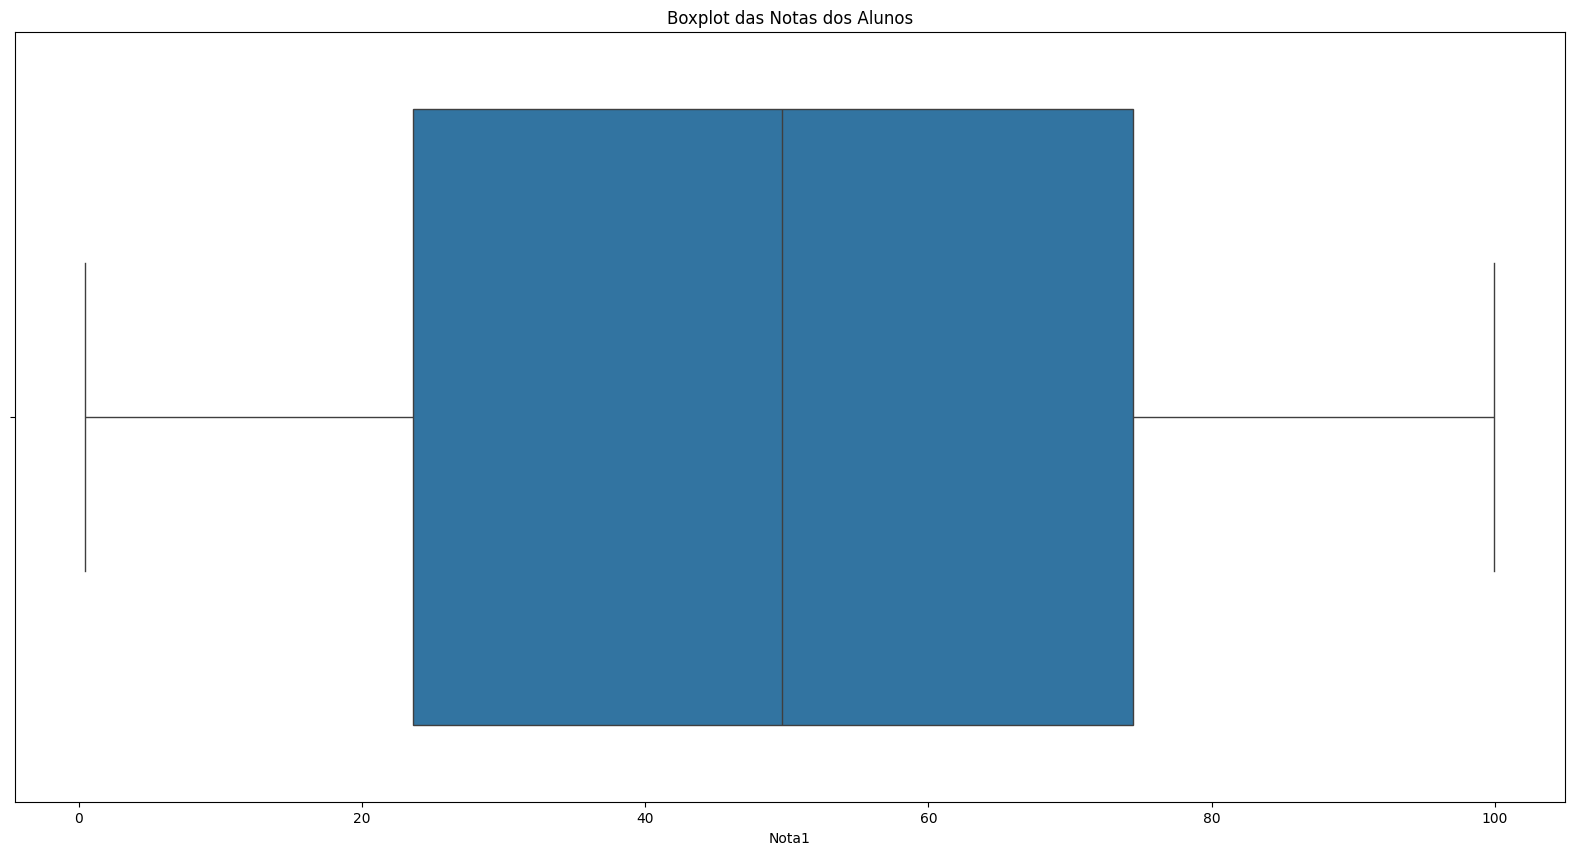

In [4]:
# Adicionando a coluna 'Nota' com notas variando de 0 a 100
np.random.seed(42) 
df_alunos['Nota1'] = np.random.uniform(0, 100, df_alunos.shape[0])  

# Exibir as primeiras linhas para verificar a nova coluna
print(df_alunos.head())

# Criando o boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x=df_alunos['Nota1'])
plt.title('Boxplot das Notas dos Alunos')
plt.xlabel('Nota1')
plt.show()



In [5]:
# Identificando outliers
Q1 = df_alunos['Nota1'].quantile(0.25)
Q3 = df_alunos['Nota1'].quantile(0.75)
IQR = Q3 - Q1  # Intervalo Interquartílico

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_alunos[(df_alunos['Nota1'] < limite_inferior) | (df_alunos['Nota1'] > limite_superior)]

# Exibindo os outliers identificados
print("Outliers identificados:")
print(outliers)

Outliers identificados:
Empty DataFrame
Columns: [ID, Idade, Nota, Nome, Nota1]
Index: []


## 3. Histograma para Frequência
Desafio: Plote um histograma das idades dos alunos do DataFrame anterior, dividindo as idades em intervalos (bins) apropriados.
- Objetivo: Analisar a frequência das idades e entender a distribuição de dados.

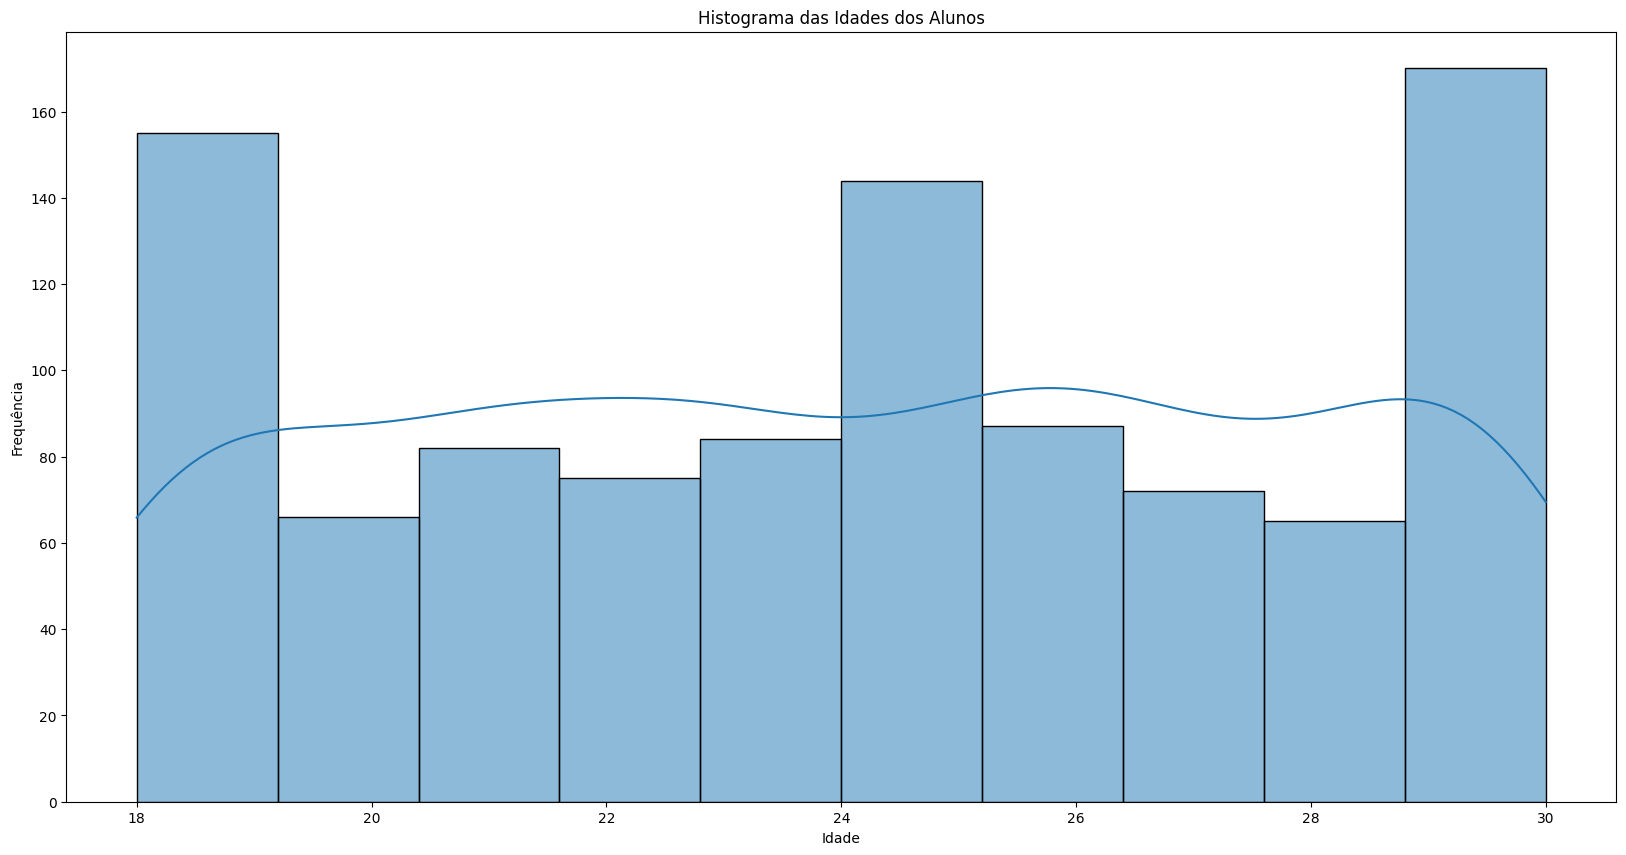

In [6]:
# Criando o histograma
plt.figure(figsize=(20, 10))
sns.histplot(df_alunos['Idade'], bins=10, kde=True)  
plt.title('Histograma das Idades dos Alunos')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

## 4. Cálculo de Covariância
Desafio: Adicione uma coluna **Horas de Estudo** ao DataFrame anterior. 
Calcule a covariância entre **Horas de Estudo** e **Nota**.
- Objetivo: Compreender a relação entre duas variáveis.

In [7]:
# Adicionar a coluna 'Horas de Estudo' com valores entre 0 e 10
df_alunos['Horas de Estudo'] = np.random.uniform(0, 10, df_alunos.shape[0])

# Exibir as primeiras linhas para verificar as colunas adicionadas
print(df_alunos.head())

# Calcular a covariância entre 'Horas de Estudo' e 'Nota'
covariancia = df_alunos[['Horas de Estudo', 'Nota']].cov()

# Exibir a matriz de covariância
print("Matriz de Covariância:")
print(covariancia)

   ID  Idade  Nota             Nome      Nota1  Horas de Estudo
0  79     30   5.6   Gustavo Nieass  37.454012         1.851329
1  43     19   0.6  Tammie Sutherns  95.071431         5.419009
2  35     20   4.1    Jordon Ruston  73.199394         8.729458
3  32     27   9.8      Benny Regan  59.865848         7.322249
4   6     22   5.1    Palmer Guerra  15.601864         8.065611
Matriz de Covariância:
                 Horas de Estudo      Nota
Horas de Estudo         8.537493  0.085212
Nota                    0.085212  8.245057


## 5. Regressão Linear Simples
Desafio: Com base nas colunas **Horas de Estudo** e **Nota**, ajuste um modelo de regressão linear simples. Plote a linha de regressão junto com os dados.
- Objetivo: Aprender sobre modelagem e previsão com regressão.

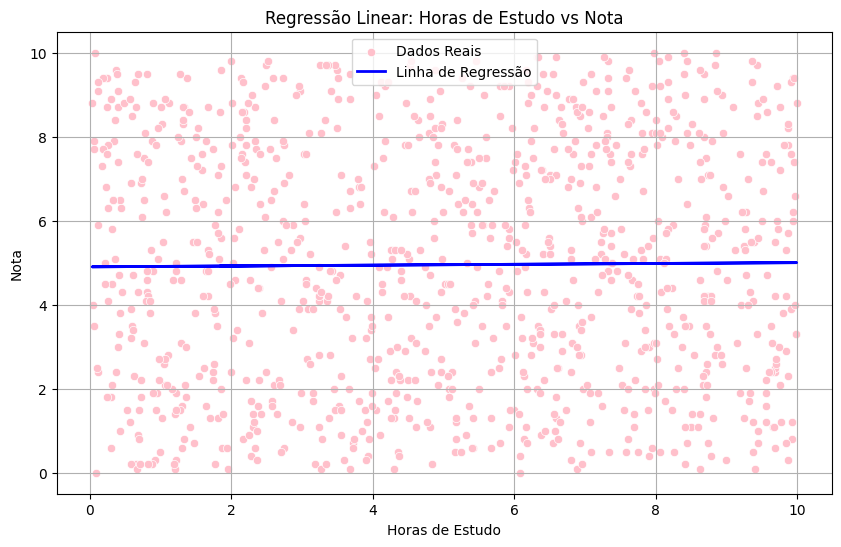

In [8]:
# Definir variáveis independentes (X) e dependentes (y)
X = df_alunos[['Horas de Estudo']]
y = df_alunos['Nota']

# Ajustar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Fazer previsões
y_pred = modelo.predict(X)

# Plotar os dados e a linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Horas de Estudo'], y=y, label='Dados Reais', color='pink')
plt.plot(X['Horas de Estudo'], y_pred, color='blue', linewidth=2, label='Linha de Regressão')
plt.title('Regressão Linear: Horas de Estudo vs Nota')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota')
plt.legend()
plt.grid()
plt.show()

## 6. Teste Qui-Quadrado
Desafio: Crie um DataFrame com a preferência de cursos (por exemplo, **Matemática**, **Física**, **Química**) entre alunos de diferentes idades. 
Realize um teste qui-quadrado para verificar se há associação entre a idade e a preferência de curso.
- Objetivo: Aplicar o teste qui-quadrado para dados categóricos.

In [9]:
# Criar um DataFrame com preferência de cursos e idades
np.random.seed(42)
idades = np.random.choice(['18-25', '26-35', '36-45', '46-60', '60+'], size=200)
cursos = np.random.choice(['Matemática', 'Física', 'Química'], size=200)

df_preferencias = pd.DataFrame({'Idade': idades, 'Curso': cursos})

# Exibir as primeiras linhas do DataFrame
print("DataFrame de Preferência de Cursos:")
print(df_preferencias.head())

# Criar uma tabela de contingência
tabela_contingencia = pd.crosstab(df_preferencias['Idade'], df_preferencias['Curso'])

# Exibir a tabela de contingência
print("\nTabela de Contingência:")
print(tabela_contingencia)

# Realizar o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

# Exibir os resultados do teste
print("\nResultados do Teste Qui-Quadrado:")
print(f"Estatística Qui-Quadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grau de Liberdade: {dof}")
print("Frequências Esperadas:")
print(expected)

# Interpretar o resultado
alpha = 0.05
if p < alpha:
    print("\nRejeitamos a hipótese nula. Há associação entre idade e preferência de curso.")
else:
    print("\nNão rejeitamos a hipótese nula. Não há associação entre idade e preferência de curso.")


DataFrame de Preferência de Cursos:
   Idade    Curso
0  46-60   Física
1    60+   Física
2  36-45   Física
3    60+  Química
4    60+  Química

Tabela de Contingência:
Curso  Física  Matemática  Química
Idade                             
18-25      16          15       12
26-35      11          13       11
36-45      14          13       10
46-60      13          14       22
60+        15          10       11

Resultados do Teste Qui-Quadrado:
Estatística Qui-Quadrado: 5.54208605328062
Valor p: 0.6983728847784942
Grau de Liberdade: 8
Frequências Esperadas:
[[14.835 13.975 14.19 ]
 [12.075 11.375 11.55 ]
 [12.765 12.025 12.21 ]
 [16.905 15.925 16.17 ]
 [12.42  11.7   11.88 ]]

Não rejeitamos a hipótese nula. Não há associação entre idade e preferência de curso.


## 7. K-Means para Agrupamento
Desafio: Geração de um conjunto de dados com características de clientes (por exemplo, **Renda** e **Gastos**). Aplique o algoritmo K-Means para agrupar os clientes e
visualize os grupos.
- Objetivo: Entender a técnica de agrupamento e suas aplicações.

DataFrame de Características dos Clientes:
          Renda        Gastos
0  57450.712295  21788.936802
1  47926.035482  22803.922632
2  59715.328072  25415.256216
3  72845.447846  25269.010260
4  46487.699379  13111.653160


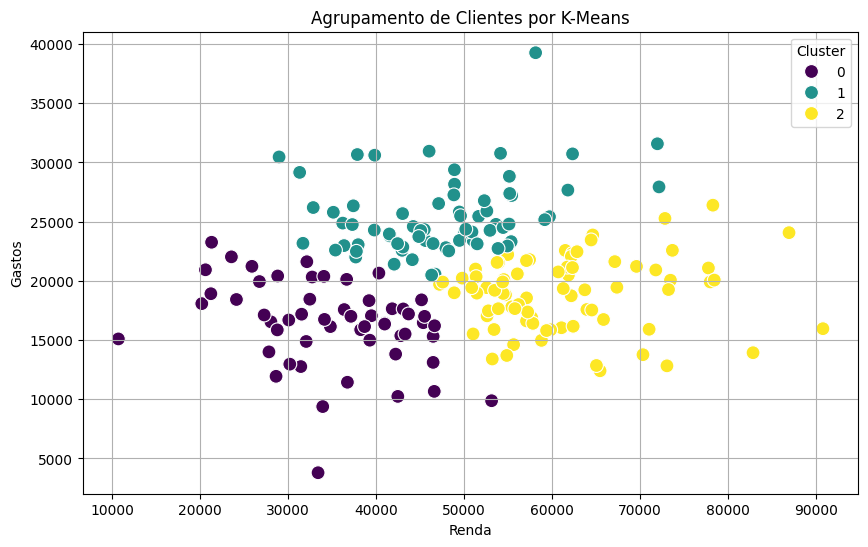

In [10]:
# Gerar um conjunto de dados com características de clientes
np.random.seed(42)
n_clientes = 200

# Criar dados de Renda e Gastos
renda = np.random.normal(loc=50000, scale=15000, size=n_clientes)  # Renda média de 50.000
gastos = np.random.normal(loc=20000, scale=5000, size=n_clientes)  # Gastos médios de 20.000

# Criar o DataFrame
df_clientes = pd.DataFrame({'Renda': renda, 'Gastos': gastos})

# Exibir as primeiras linhas do DataFrame
print("DataFrame de Características dos Clientes:")
print(df_clientes.head())

# Normalizar os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df_clientes)

# Aplicar o algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Definindo 3 clusters
kmeans.fit(dados_normalizados)

# Adicionar os rótulos dos clusters ao DataFrame
df_clientes['Cluster'] = kmeans.labels_

# Visualizar os grupos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clientes, x='Renda', y='Gastos', hue='Cluster', palette='viridis', s=100)
plt.title('Agrupamento de Clientes por K-Means')
plt.xlabel('Renda')
plt.ylabel('Gastos')
plt.legend(title='Cluster')
plt.grid()
plt.show()

## 8. Análise de Componentes Principais (PCA)
Desafio: Use um conjunto de dados multivariados (como o conjunto de dados Iris). Aplique PCA e visualize os primeiros dois componentes principais.
- Objetivo: Reduzir a dimensionalidade dos dados e explorar suas variáveis.

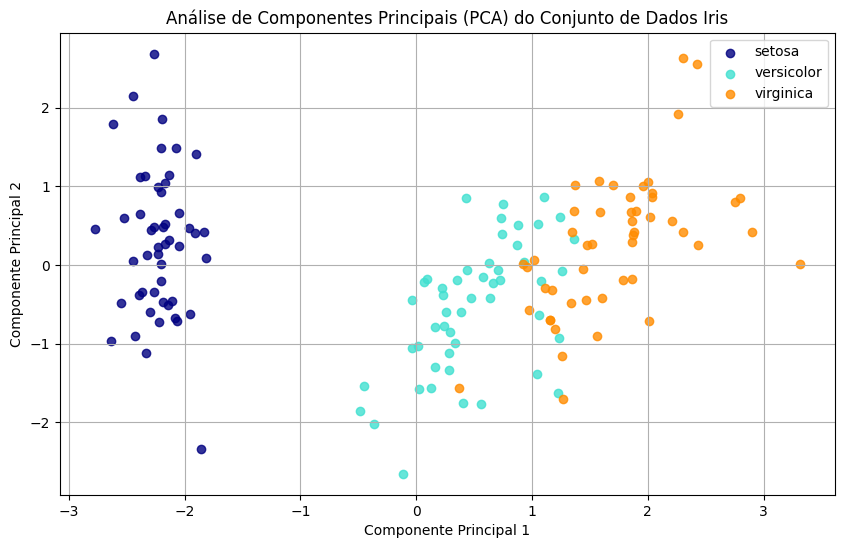

In [39]:
# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Criar um DataFrame com os dados Iris
df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris['Species'] = [target_names[i] for i in y]

# Normalizar os dados
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalizado)

# Criar um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Species'] = df_iris['Species']

# Visualizar os resultados
plt.figure(figsize=(10, 6))
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(df_pca[df_pca['Species'] == target_name]['Componente 1'],
                df_pca[df_pca['Species'] == target_name]['Componente 2'],
                color=color, alpha=.8, label=target_name)

plt.title('Análise de Componentes Principais (PCA) do Conjunto de Dados Iris')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid()
plt.show()

## 9. Distribuição Binomial
Desafio: Simule uma situação em que você realiza 10 tentativas de um experimento com uma probabilidade de sucesso de 0,3. Calcule e visualize a distribuição binomial
para 0 a 10 sucessos.
- Objetivo: Entender e aplicar a distribuição binomial.

In [37]:
# Gerando valores aleatórios para as colunas de tentativas e probabilidade de sucesso
df_alunos['tentativas'] = np.random.randint(0, 10, size=len(df_alunos))  # Tentativas entre 0 e 10
df_alunos['probabilidade_sucesso'] = np.random.uniform(0.1, 0.9, size=len(df_alunos))  # Probabilidade entre 0.1 e 0.3

In [53]:
# Criando uma pequena amostra
amostra_df_alunos2 = df_alunos.sample(n=10)
print(amostra_df_alunos2)

     ID  Idade  Nota               Nome  probabilidade_sucesso  tentativas
954  92     29   3.3  Christine Twigger               0.115978           6
150  73     24   7.6   Emelen Petruszka               0.448997           9
750  33     23   7.7      Garek Carbert               0.200888           5
334  79     29   3.0     Torey Schoular               0.130721           3
683  86     29   1.5   Irita Scrauniage               0.475220           4
239  72     22   7.3        Ashil Pelos               0.713078           6
627   7     26   1.6      Patsy Jessope               0.206733           5
811  52     26   7.3   Roseann Aberhart               0.341269           9
828  65     22   1.9     Sarette Purves               0.624657           4
556  48     26   3.2      Lindsay Figin               0.740110           1


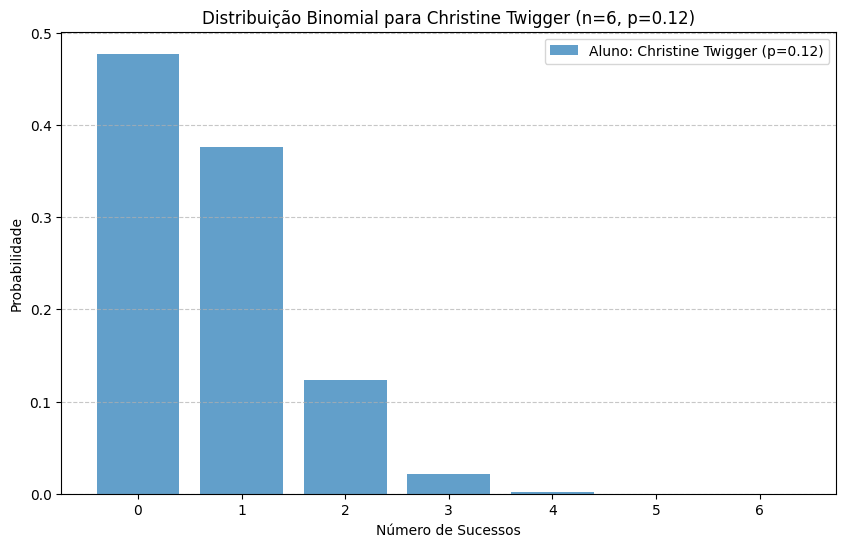

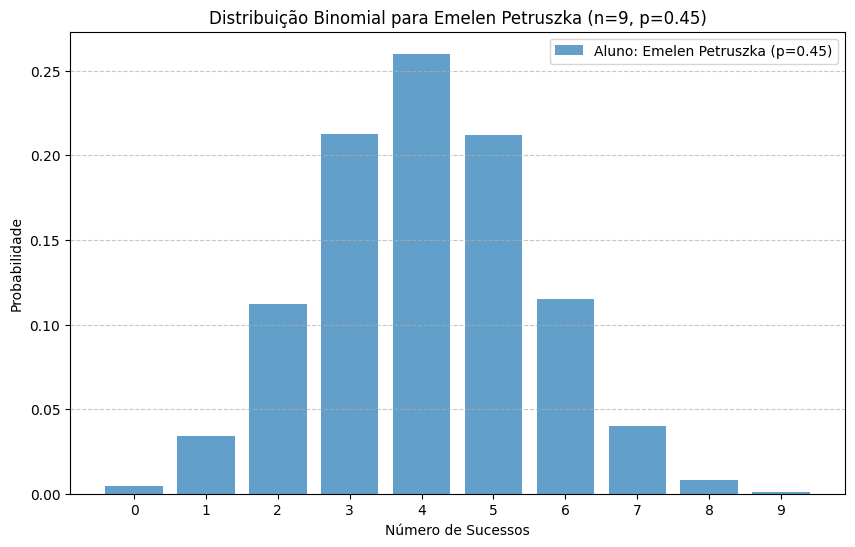

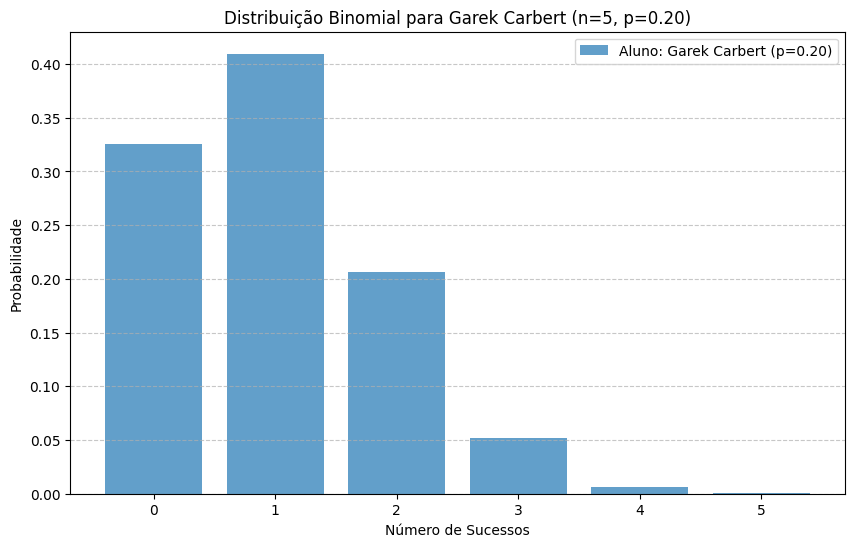

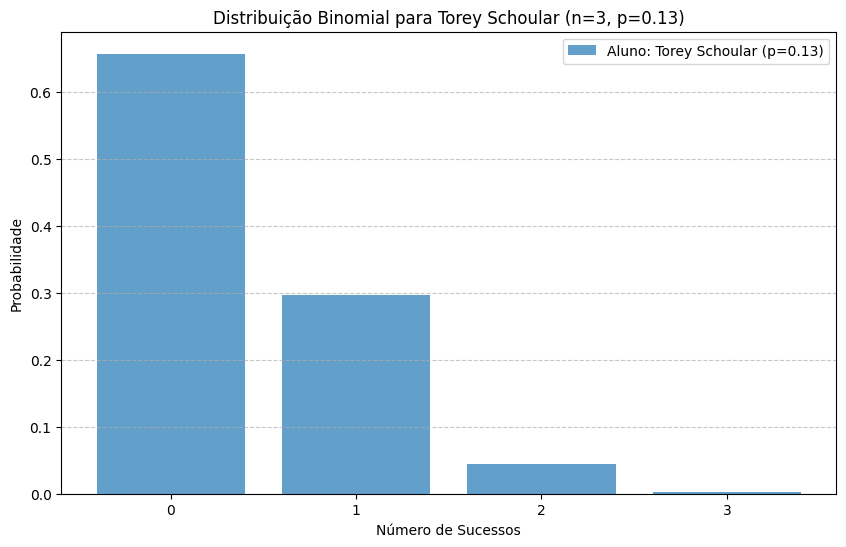

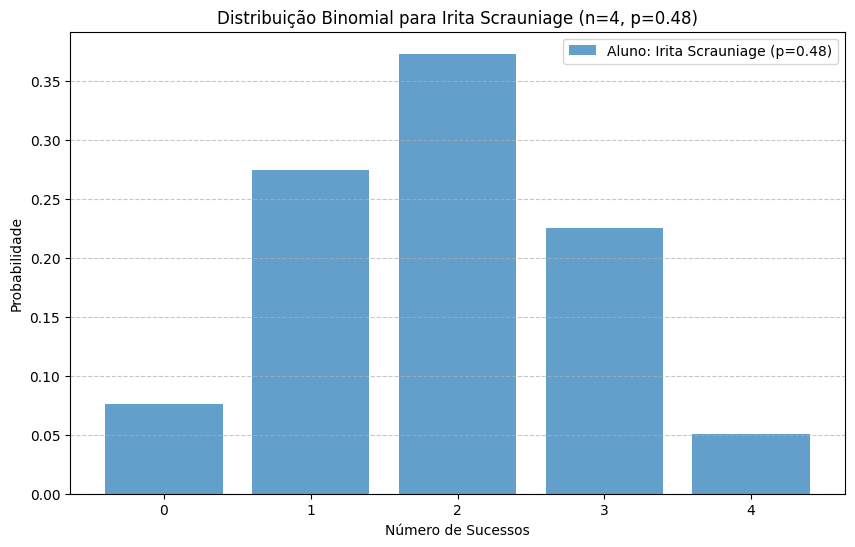

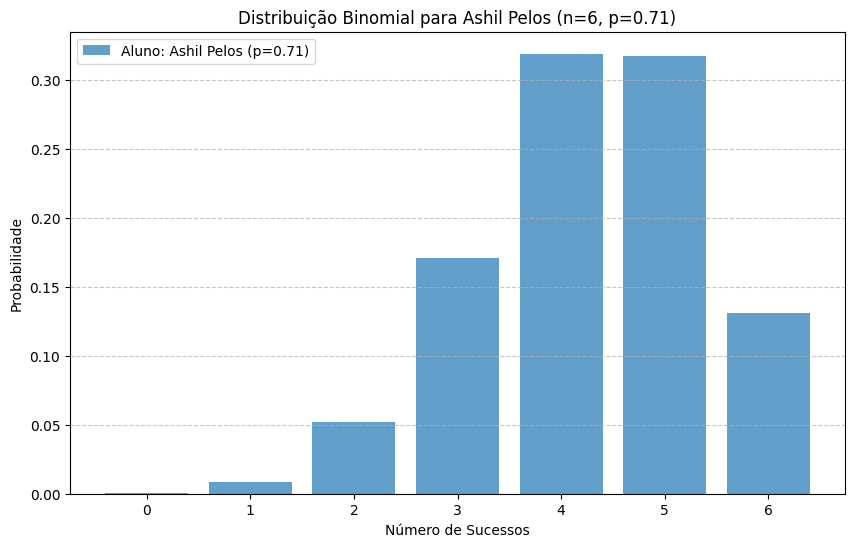

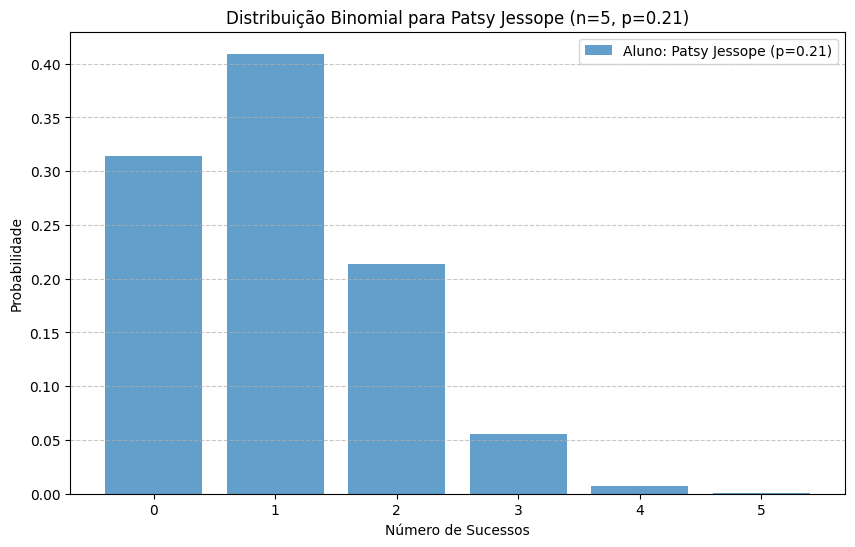

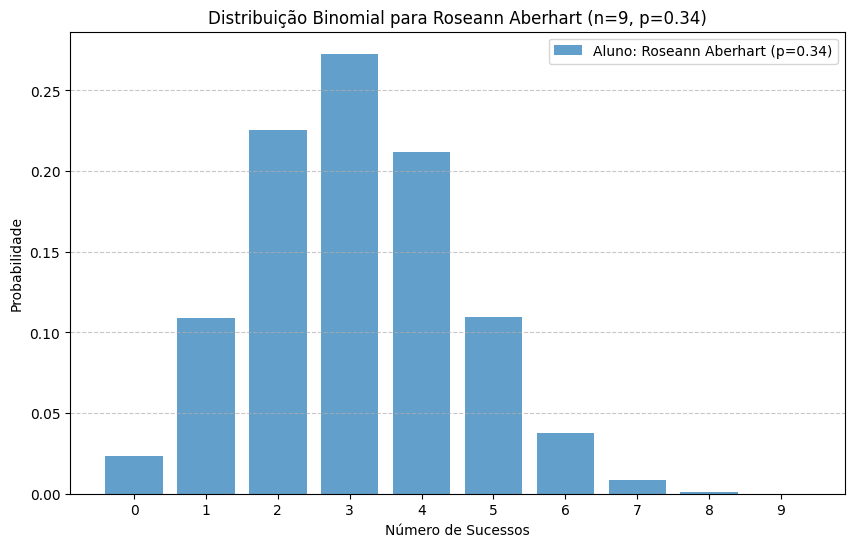

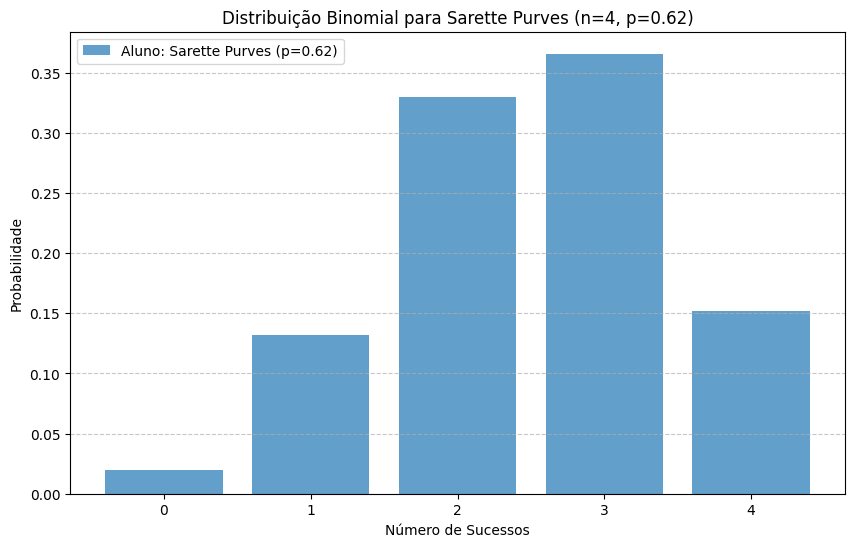

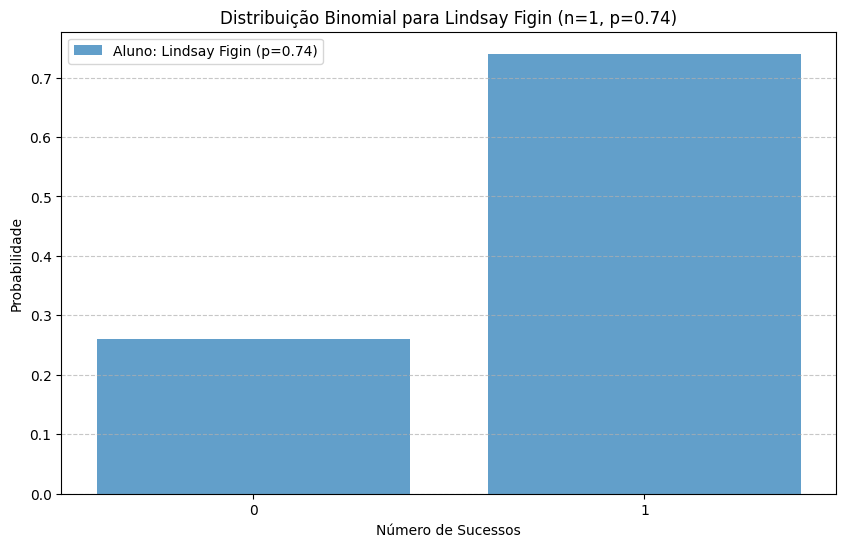

In [54]:
# Iterando pelos alunos e calculando a distribuição binomial
for index, row in amostra_df_alunos2.iterrows():
    n = row['tentativas']
    p = row['probabilidade_sucesso']
    x = np.arange(0, n + 1)

    # Calculando a distribuição binomial
    binomial_distribution = binom.pmf(x, n, p)

    # Visualizando a distribuição binomial para cada aluno
    plt.figure(figsize=(10, 6))
    plt.bar(x, binomial_distribution, alpha=0.7, label=f'Aluno: {row["Nome"]} (p={p:.2f})')
    plt.title(f'Distribuição Binomial para {row["Nome"]} (n={n}, p={p:.2f})')
    plt.xlabel('Número de Sucessos')
    plt.ylabel('Probabilidade')
    plt.xticks(x)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

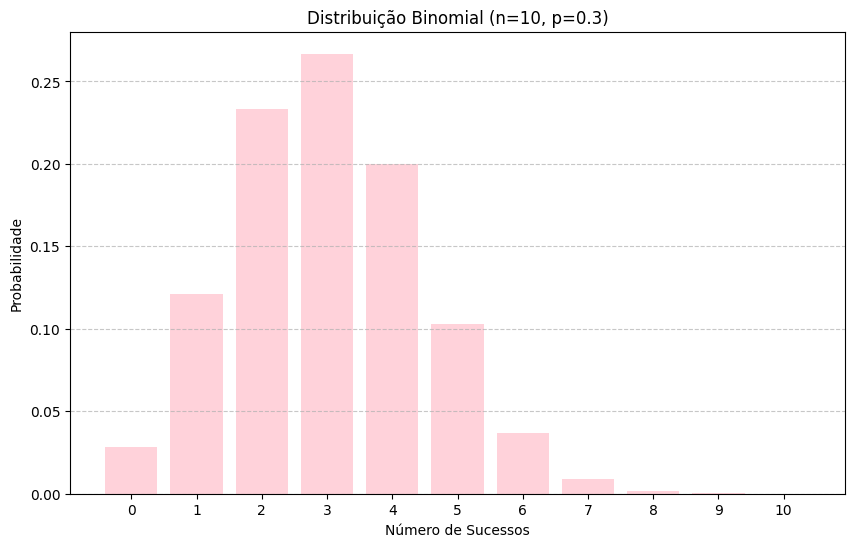

,Número de Sucessos,Probabilidade
0,0,0.028248
1,1,0.121061
2,2,0.233474
3,3,0.266828
4,4,0.200121
5,5,0.102919
6,6,0.036757
7,7,0.009002
8,8,0.001447
9,9,0.000138


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

# Definindo o número de tentativas e a probabilidade de sucesso
n = 10  # Número de tentativas
p = 0.3  # Probabilidade de sucesso

# Criando um array com o número de sucessos de 0 a n
x = np.arange(0, n + 1)

# Calculando a distribuição binomial
binomial_distribution = binom.pmf(x, n, p)

# Criando o DataFrame para visualização
df_binomial = pd.DataFrame({
    'Número de Sucessos': x,
    'Probabilidade': binomial_distribution
})

# Visualizando a distribuição binomial
plt.figure(figsize=(10, 6))
plt.bar(df_binomial['Número de Sucessos'], df_binomial['Probabilidade'], alpha=0.7, color='pink')
plt.title('Distribuição Binomial (n=10, p=0.3)')
plt.xlabel('Número de Sucessos')
plt.ylabel('Probabilidade')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Exibindo o DataFrame
display(df_binomial)


## 10. Análise de Séries Temporais
Desafio: Crie uma série temporal simulada de vendas mensais de um produto ao longo de dois anos. Plote os dados e analise a tendência.
- Objetivo: Aprender a manipular e analisar dados de séries temporais.

/tmp/ipykernel_11313/3325924421.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='M')


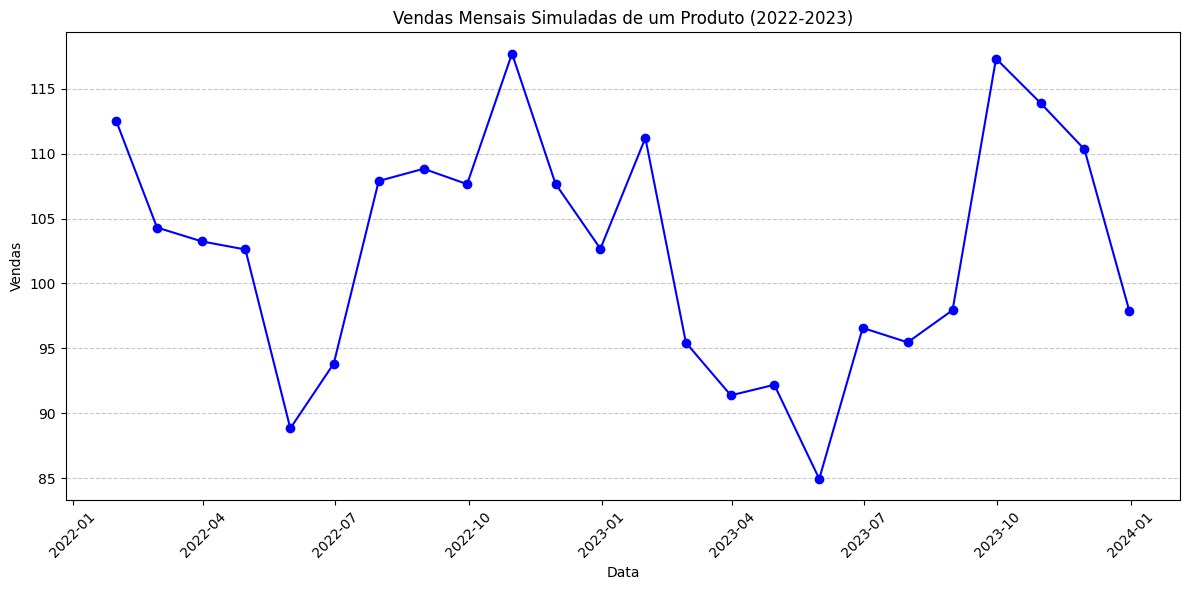

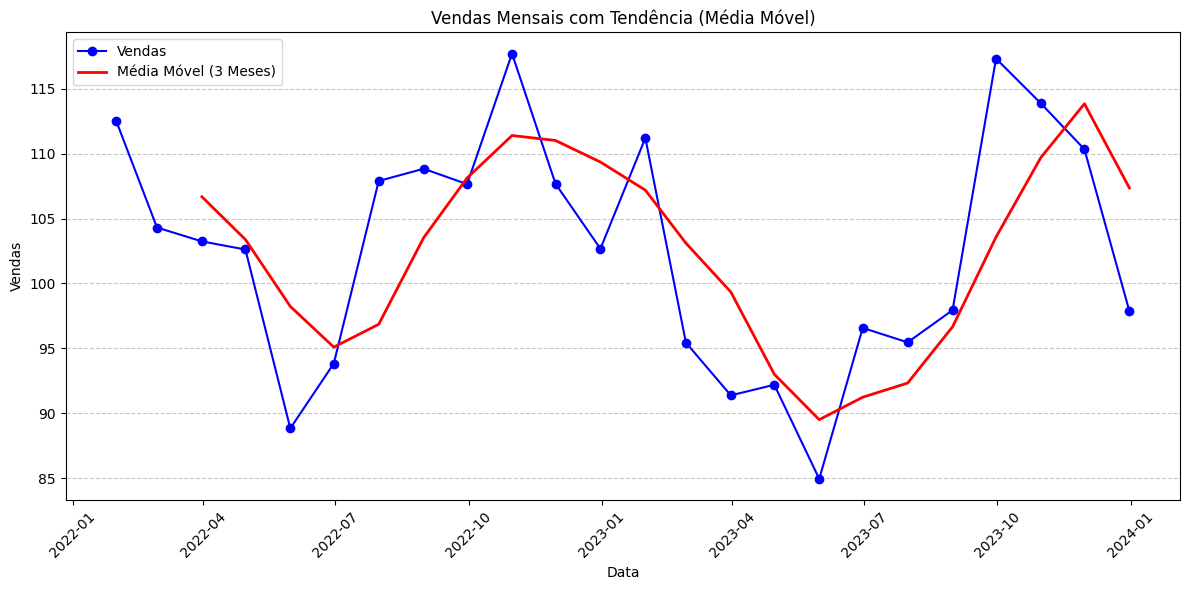

In [62]:
# Definindo o período da série temporal
start_date = '2022-01-01'
end_date = '2023-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# Simulando vendas mensais
np.random.seed(42)  # Para reprodutibilidade
base_sales = 100    # Vendas base
seasonal_variation = np.array([10, 5, 0, -5, -10, -5, 0, 5, 10, 15, 10, 5] * 2)  # Variação sazonal
random_noise = np.random.normal(0, 5, len(date_range))  # Ruído aleatório

# Gerando as vendas simuladas
sales = base_sales + seasonal_variation + random_noise
sales[sales < 0] = 0  # Garantindo que as vendas não sejam negativas

# Criando um DataFrame
df_sales = pd.DataFrame({'Data': date_range, 'Vendas': sales})

# Plotando os dados
plt.figure(figsize=(12, 6))
plt.plot(df_sales['Data'], df_sales['Vendas'], marker='o', linestyle='-', color='blue')
plt.title('Vendas Mensais Simuladas de um Produto (2022-2023)')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análise da tendência
df_sales['Média Móvel'] = df_sales['Vendas'].rolling(window=3).mean()  # Média móvel de 3 meses

# Plotando a média móvel
plt.figure(figsize=(12, 6))
plt.plot(df_sales['Data'], df_sales['Vendas'], marker='o', linestyle='-', color='blue', label='Vendas')
plt.plot(df_sales['Data'], df_sales['Média Móvel'], color='red', label='Média Móvel (3 Meses)', linewidth=2)
plt.title('Vendas Mensais com Tendência (Média Móvel)')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
